# [reference](https://www.youtube.com/watch?v=Pb3opEFP94U)

In [ ]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=f2ac04b5eae5a3f403eb5e1bf9973b6d389be4af687741cc29e7201dfc604250
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.


In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 6.6 kB/s 
     |████████████████████████████████| 12.8 MB 15.4 MB/s 
     |████████████████████████████████| 7.6 MB 4.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1+cu113
    Uninstalling torchaudio-0.12.1+cu113:
      Successfully uninstalled torchaudio-0.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 2.0 MB/s 
     |████████████████████████████████| 151 kB 5.0 MB/s 
     |████████████████████████████████| 130 kB 41.4 MB/s 
     |████████████████████████████████| 79 kB 10.5 MB/s 
     |████████████████████████████████| 50 kB 8.6 MB/s 
     |████████████████████████████████| 843 kB 66.0 MB/s 
     |████████████████████████████████| 117 kB 70.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=d70b6a251a74cd2cebb4dba205af1c7e5fc6430dd90bb82d5f594445dbe6483b
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=bd983bde5ae7d0f20d0

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer,ColorMode
from detectron2.data import MetadataCatalog,DatasetCatalog

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
class Detector:
    def __init__(self, model_type = 'OD'):
      self.cfg = get_cfg()
      self.model_type = model_type

      if model_type == 'OD':
            # for object detection
            #load model and configure the pre-trained model
            self.cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml')
      elif model_type == 'IS':
            # for instance segmentation
            #https://github.com/facebookresearch/detectron2/blob/main/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml
            self.cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml'))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml')
      elif model_type == 'KPD':
            # for keypoint detection
            #https://github.com/facebookresearch/detectron2/blob/main/configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml
            self.cfg.merge_from_file(model_zoo.get_config_file('COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml'))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml')
      elif model_type == 'LVIS':
            # for LVIS instance segmentation
            #https://github.com/facebookresearch/detectron2/blob/main/configs/LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml
            self.cfg.merge_from_file(model_zoo.get_config_file('LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml'))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml')
      elif model_type == 'PS':
            # for panoptic segmentation
            #https://github.com/facebookresearch/detectron2/blob/main/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml
            self.cfg.merge_from_file(model_zoo.get_config_file('COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml'))
            self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml')

      self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
      self.cfg.MODEL.DEVICE = 'cpu'  # cpu or cuda

      self.predictor = DefaultPredictor(self.cfg)


    def onImage(self,imagepath):
        image = cv2.imread(imagepath)

        if self.model_type !='PS':
            predictions = self.predictor(image)
            viz = Visualizer(image[:,:,::-1], metadata= MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]), instance_mode=ColorMode.IMAGE_BW)
            output = viz.draw_instance_predictions(predictions['instances'].to('cpu'))

        else:
            predictions, segment_info = self.predictor(image)['panoptic_seg']
            viz = Visualizer(image[:,:,::-1], metadata= MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]))
            output = viz.draw_panoptic_seg_predictions(predictions.to('cpu'),segments_info = segment_info)


        cv2_imshow(output.get_image()[:,:,::-1])  # for colab only
        cv2.waitKey(0)

# Object Detection

In [ ]:
paths = ['/content/image1.jpg','/content/image2.jfif','/content/images.jfif','/content/image1.jpeg','/content/image2.jpg','/content/image3.jfif']
detector = Detector()
for image in paths:
  detector.onImage(image)

# Instance Segmentation

In [ ]:
instance_segment = Detector(model_type='IS')

for image in paths:
  instance_segment.onImage(image)

# Key points detection for persons

In [ ]:
key_point = Detector('KPD')

for image in paths:
  key_point.onImage(image)

# Large vocabulary image segmentation

In [ ]:
lvis = Detector('LVIS')
for image in paths:
  lvis.onImage(image)

# Panoptic segmentation

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


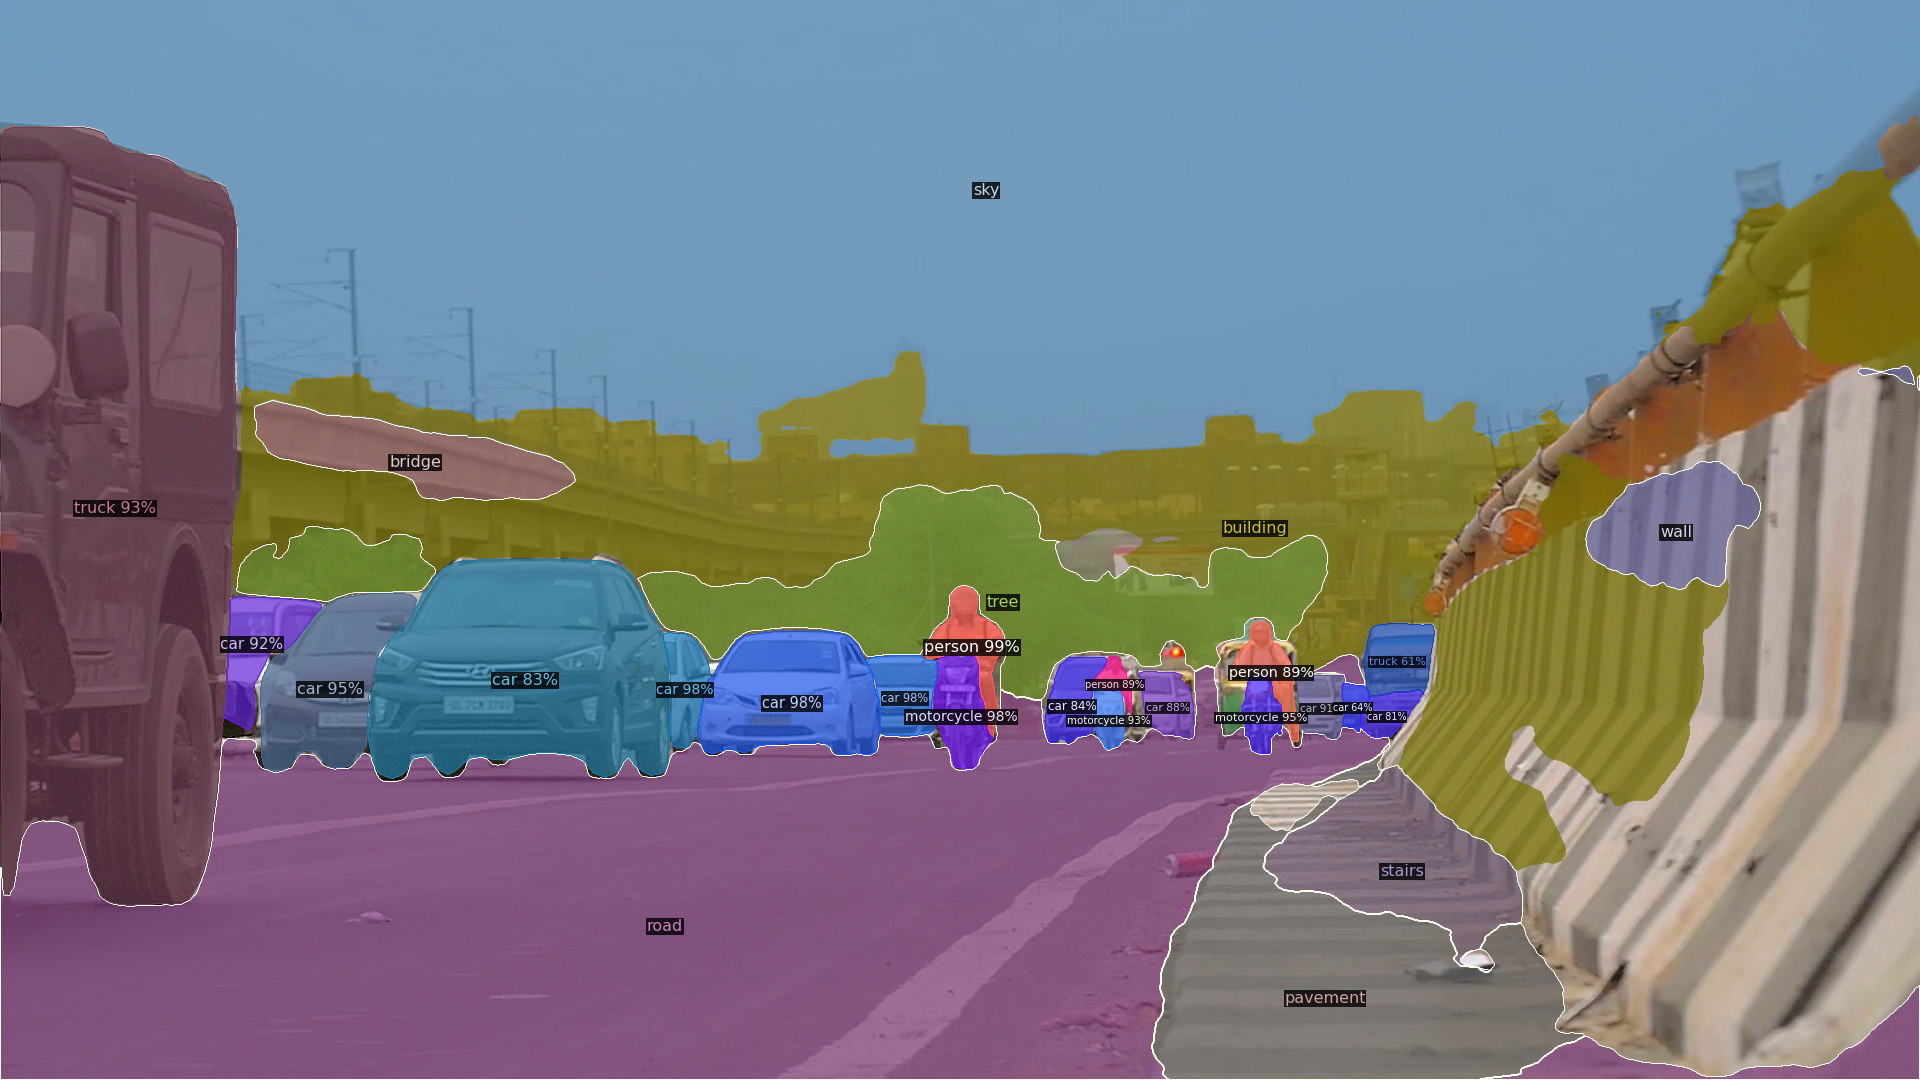

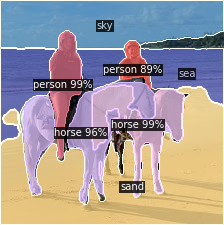

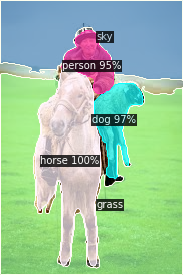

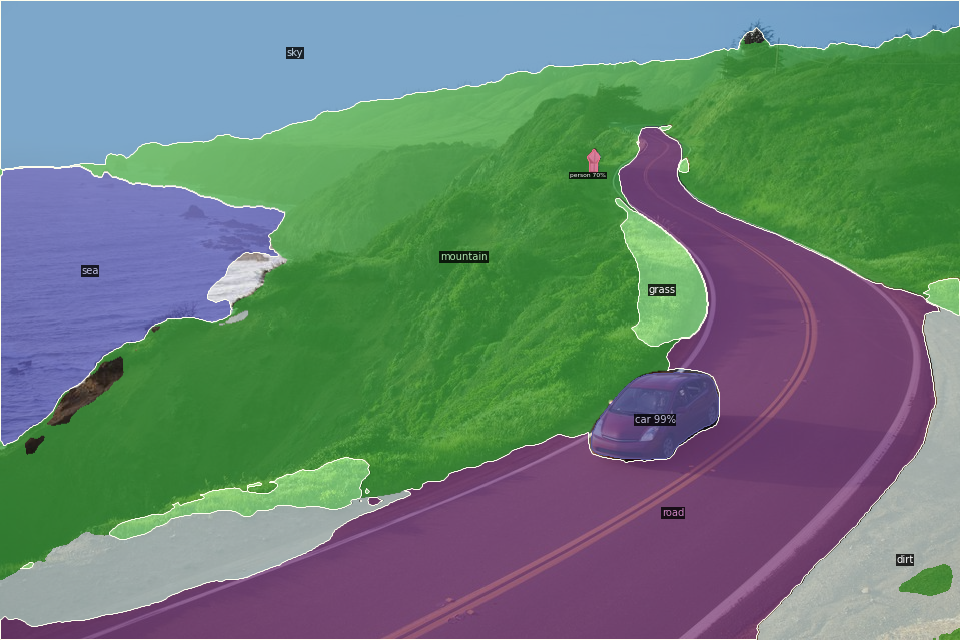

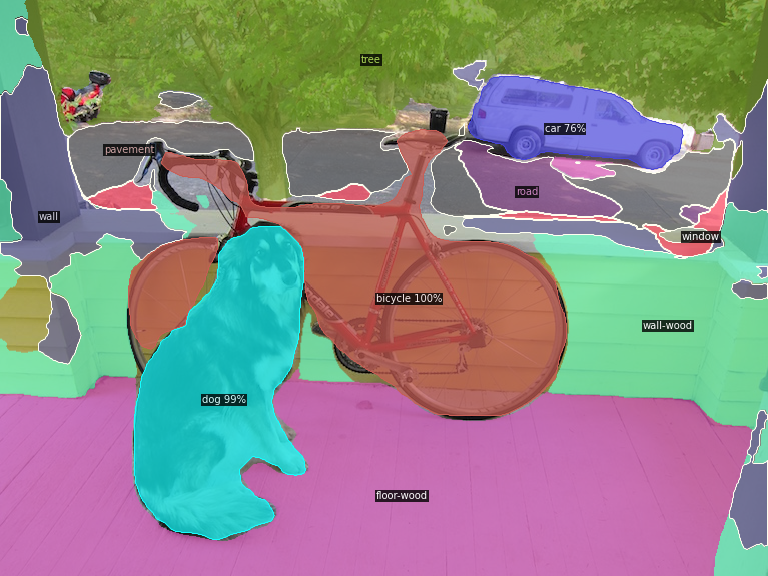

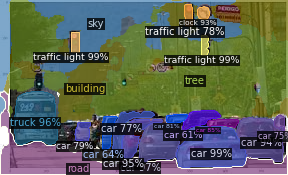

In [ ]:
panoptic = Detector('PS')
for image in paths:
  panoptic.onImage(image)